# Task 1:Prediction using Supervised ML



## Author : V.Sai Manohar

### Problem Statement:

#### *Predict the percentage of student based on the no of study hours



#### *What will be the predicted score if a student studies for 9.25 hrs/day

## Importing Required Libraries


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Importing data 

In [7]:
path="http://bit.ly/w-data"
dataset=pd.read_csv(path)


In [8]:
Dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
#here we use describe() method so that we can able to see percentiles,mean,std,max,count of the given dataset.
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#summary of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Plot to show distribution of Hours studied and percentage stored

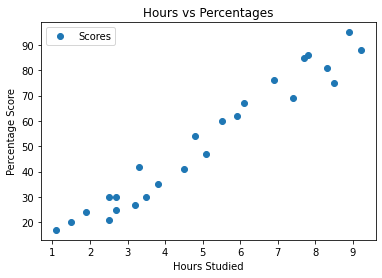

In [16]:
dataset.plot(x="Hours",y="Scores",style="o")
plt.title("Hours vs Percentages")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

### From the above scatter plot graph we can say there is positive relation between no of hours studied and percentage of score

## preparing the data

In [20]:
X = dataset.iloc[:,:-1].values#copying all rows and columns except last column values
Y = dataset.iloc[:,1].values#copying only last column values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## splitting into train and test sets

In [23]:
#splitted dataset into 80% train data which model(algoritham) uses for training and 20% test data for model to predict
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

## Training the Model

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)


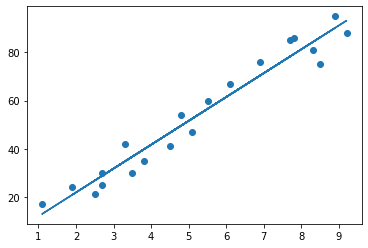

In [35]:
#this linear line is prediction of model,model used this y = mx + b formula
plt.scatter(X_train,Y_train)
plt.plot(X_train,model.predict(X_train))

In [49]:
#as i cant compare with 1 dimensional data i convert test data to list 
x_test1=list(X_test)
print(x_test1)

[array([1.5]), array([3.2]), array([7.4]), array([2.5]), array([5.9])]


In [50]:
prediction=model.predict(X_test)
pd.DataFrame({'TestHours':x_test1,'Actual_Score':Y_test,'Predicted_Score':prediction})

,TestHours,Actual_Score,Predicted_Score
0,[1.5],20,16.884145
1,[3.2],27,33.732261
2,[7.4],69,75.357018
3,[2.5],30,26.794801
4,[5.9],62,60.491033


In [69]:
hours=[[9.25]]
custom=model.predict(hours)
print(f'for 9.25 hours predicted score is {custom[0]}')

for 9.25 hours predicted score is 93.69173248737538


## Acurracy of the model

In [72]:
from sklearn import metrics
metrics.r2_score(Y_test,prediction)


0.9454906892105356

## 94% Accuracy score indicates our linear regression model is working good on data